In [1]:
import numpy as np
import os
import cv2

from sklearn.decomposition import PCA

from scipy.ndimage import rotate, correlate

import matplotlib.pyplot as plt

/home/tuomas/py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
def make_sample(dims,side,ori,axes):
    sample = np.zeros((dims))
    y1 = int(dims[0]/2 - side[0]/2)
    y2 = int(y1 + side[0])
    x1 = int(dims[1]/2 - side[1]/2)
    x2 = int(x1 + side[1])
    z1 = int(dims[2]/2 - side[2]/2)
    z2 = int(z1 + side[2])
    
    sample[y1:y2,x1:x2,z1:z2] = 255
    
    return rotate(sample,ori,axes)

In [5]:
#Generate sample
dims = (100,100,100)
side = (50,50,80)
ori = -15
axes = (0,2)
sample = make_sample(dims,side,ori,axes)

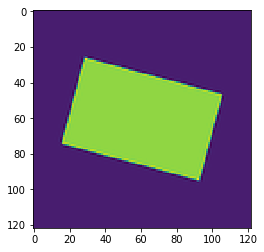

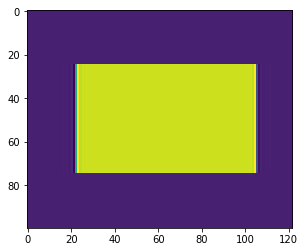

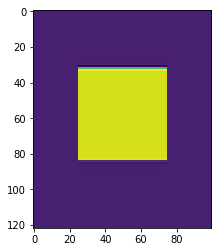

In [7]:
#Visualization
plt.imshow(sample[:,50,:])
plt.show()
plt.imshow(sample[50,:,:])
plt.show()
plt.imshow(sample[:,:,50])
plt.show()

In [29]:
def find_contours(image):
    #Normalizae gs values, nd convert to 8-bit image
    image = (image-image.min())/(image.max()-image.min())
    image *= 255
    image = image.astype(np.uint8)
    ex = cv2.Sobel(image,cv2.CV_8UC1,1,0)
    ey = cv2.Sobel(image,cv2.CV_8UC1,0,1)
    
    E = (np.abs(ex)+np.abs(ey))>0
    
    return E

def get_ori(BW,axis):
    #Get contour indices from BW image
    c = np.array(np.nonzero(BW)).T
    #Fit pca
    pcs = PCA(1,random_state=42)
    pcs.fit(c)
    #Get components
    x = pcs.components_
    #Normalize to unit length
    L2 = np.linalg.norm(x)
    x_n = x/L2
    #Generate vector for the other axis
    if axis == 0:
        y = np.array([1,0]).reshape(-1,1)
    elif axis == 1:
        y = np.array([0,1]).reshape(-1,1)
    
    #Get orientation using dot product
    ori = np.arccos(np.matmul(x_n,y))
    
    return ori

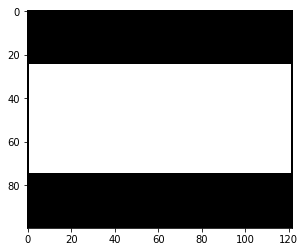

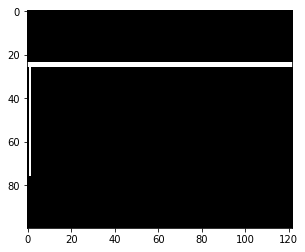

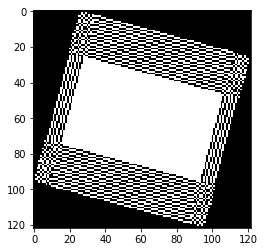

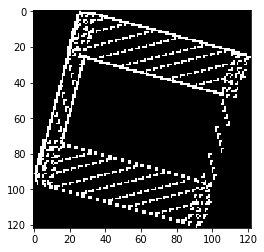

In [23]:
#Edge detection using opencv
xz = (sample>0).sum(0)
yz = (sample>0).sum(1)

bwx = (xz>0)*255
bwy = (yz>0)*255

ex = find_contours(bwx)
ey = find_contours(bwy)

plt.imshow(bwx,cmap = 'gray')
plt.show()
plt.imshow(ex,cmap = 'gray')
plt.show()
plt.imshow(bwy,cmap = 'gray')
plt.show()
plt.imshow(ey,cmap = 'gray')
plt.show()

In [32]:
#Fintd the orienation of the sample using PCA
ori_y = get_ori(ey,0)
print(ori_y)

ori_x = get_ori(ex[:,20:-20],1)
print(ori_x)

[[0.41003648]]
[[0.]]
